# Logistic Regression and Classification problems

This notebook will introduce you to the basics of logistic regression, guide you through a naive implementation of the algorithm, and teach you the basics of the SciKit-learn data analysis library via comparing our naive model with their implementation. At the end of the notebook we will look at a dataset and go through the initial qualitative analysis routine.

### Assumptions


* Assume a binary outcome of the dependent variable $y$ (1/0, yes/no, dead/alive, false/true)
* Only non-collinear (mutually independent) variables $x_i$ are included
* Expect a linear dependence between the variables $x_i$ and the log odds
* The training dataset should be sufficiently large if logistic regression is to be effective

### Plan for today
1. Binary logistic regression 
2. Comparison with scikit implementation
3. Short project

### How to learn anything?

* *Don't be afraid, make mistakes, and ask questions.*
* *Practice makes perfect*. Initially you will be making mistakes, the more you practice the sooner you will become a pro.
* If you don't understand something, first compose the question properly, think about it, and if you can't think of a solution ask someone!
* Before you execute any cell, stop and try to predict what it will do! Ideally write your prediction on a piece of paper!
* Experiment! Change the code in the cells, try various test cases to understand how the code behaves.

## 1. Implementation of logistic regression

In order to begin, use matplotlib and numpy to plot the logistic function $\phi(z)$ over a sufficiently long range of $z$-values to showcase its behaviour. $$\phi(z) = \frac{1}{1 + exp(-z)}$$
    

In [ ]:
# CODE HERE

In [1]:
# Solution
import matplotlib.pyplot as plt
import numpy as np

def logit(z):
    """ Logistic function """
    return 1 / (1 + np.exp(-z))

logit = np.vectorize(logit)
xvals = np.linspace(-10,10, 1000)

plt.plot(xvals, logit(xvals))
plt.ylabel("$logit(z)$")
plt.xlabel("z")
plt.grid()


Assuming the input data has a single independent variable $x$ (feature) and a binary result $y$, the maximum likelihood $L(\alpha_0, \alpha_1)$ becomes: 

$$L(\alpha_0, \alpha_1) = \prod_{i} P(x_i)^{y_i}\left(1-P(x_i)\right)^{1-y_i},$$

where the product runs over all the datapoints $i$, and $P(\vec{x})$ is the logistic probability function. Log-likelihood can then be expressed as: 

$$l(\alpha_0,\alpha_1) = \sum_{i=1}^n - \log\left(1 + \exp({\alpha_0 + \alpha_1 x_i})\right) + \sum_{i=1}^n y_i(\alpha_0 + \alpha_1 x_i),$$

and the partial derivatives of the log-likelihood:


$$\frac{\partial l}{\partial \alpha_0} = -\sum_{i=1}^n y_i - P(x_i; \alpha_0, \alpha_1)\qquad\text{and}\qquad \frac{\partial l}{\partial \alpha_1} = -\sum_{i=1}^n \left(y_i - P(x_i; \alpha_0, \alpha_1)\right)x_{i}$$

As before, to find the optimal parameters $\alpha_0, \alpha_1$ we will code a function minimiser. In the previous lecture you have coded a simple gradient-descent, we will quickly go through the process again. The more confident can google the newton-raphson minimiser and implement it instead.

In [ ]:
""" Code the functions beneath:
    data -> a two-dimensional numpy array consisting of (x_i, y_i) pairs
    weights -> a numpy array with the weights (alpha_0, alpha_1)
"""

def logit(z):
    """ The logistic probability function """
    return ???????

def loglike(data, weights):
    """ Log-likelihood function with one dependent variable"""
    return ???????

def gradient_0(data, weights):
    """ Partial derivative with respect to alpha 0 """
    return ???????

def gradient_1(data, weights):
    """ Partial derivative with respect to alpha 1 """
    return ???????

In [ ]:
# Solutions
# Define the functions to be used in the minimisation

def logit(z):
    """ The logistic probability function """
    return 1 / (1 + np.exp(-z))

def loglike(data, weights):
    """ Log-likelihood function with one dependent variable"""
    return np.sum(-np.log(1 + np.exp(weights[0] + weights[1]*data[:,0]))) + np.sum(data[:,1]*(weights[0] + weights[1]*data[:,0]))

def gradient_0(data, weights):
    """ Partial derivative with respect to alpha 0 """
    return -np.sum(data[:,1] - logit(weights[0] + weights[1]*data[:,0]))

def gradient_1(data, weights):
    """ Partial derivative with respect to alpha 1 """
    return -np.sum((data[:,1] - logit(weights[0] + weights[1] * data[:,0])) * data[:,0])

Functions defined in this way can be converted into vectorised functions that can be applied to whole numpy arrays:

In [ ]:
logit = np.vectorize(logit)
loglike = np.vectorize(loglike)

The next step is to write the gradient descent minimiser function, it is important in multivariate gradient descent that updates in all directions are done simultaneously, i.e. the calculations should not be done sequentially. Calculate the steps required in each direction, store them in an array, and update the positions only once all are calculated! It increases the convergence speed of the algorithm.

In [ ]:
def minimise(derivative_0, derivative_1, data, initVals, learning_rate, tolerance):
    current_guess = initVals
    adjustment = np.full_like(current_guess, 1)
    
    while ???????:
        adjustment[0] = ???????
        adjustment[1] = ???????
        current_guess = current_guess + adjustment
    
    return current_guess

In [ ]:
# SOLUTION
def minimise(func, grad_0, grad_1, data, guess, step, tolerance):
    current_guess = guess
    adjustment = np.full_like(current_guess, 1)
    
    while np.linalg.norm(adjustment) > tolerance:
        adjustment[0] = - step * grad_0(data, current_guess)
        adjustment[1] = - step * grad_1(data, current_guess)
        current_guess = current_guess + adjustment
        
    return current_guess

In order to see if our model works, we will be using the following dataset: https://www.kaggle.com/uciml/glass. Putting it all together:
    - Import the dataset
    - Guess the weights $\alpha_0, \alpha_1$
    - Run the multivariate gradient descent on the cost function
    - Use the weights to predict the outcome probabilities on the data set
    - Evaluate the accuracy
    
 We start by using pandas to import the dataset, and then have a quick look at a few entries to get the overall feel for the structure:

In [2]:
import pandas as pd

dataset = pd.read_csv("glass.csv") # importing the data from the .csv file
dataset.sort_values('Al', inplace=True) # sort by ascending "Al" values
dataset.head() # print the first 5 rows

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


As a data scientist, it is important to first take a look at a dataset and gain a qualitative understanding of the underlying correlations before applying any quantitative models. Because we are only testing our model now, we will skip this part, and I will artificially claim that the only important feature is the aluminum content "al". Don't worry, we will do some full-fledged dataset analysis later on!

We can now plot the binary response vs the independent variable "al", uhm, I mean, you can! Plot the first column of the "data" array vs the second column. Don't forget to label axes!

In [ ]:
dataset['binary'] = dataset.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
data = np.stack((dataset["Al"], dataset["binary"]), axis=-1)

In [ ]:
# SOLUTION
plt.scatter(data[:,0], data[:,1])
plt.xlabel("Aluminum content")
plt.ylabel("Binary outcome")

Everything is ready to employ the logistic model, use the functions you have implemented, and guess some values for the step, tolerance and the initial weights in order to find the best fit.

In [ ]:
# CODE HERE

In [ ]:
# SOLUTION
guess = np.array((0., 4.180403861451090))
step = 0.001
tolerance = 0.0000001

weights = minimise(loglike, gradient_0, gradient_1, data, guess, step, tolerance)

print(weights)

Once you know the weights, use your knowledge of the logistic model to plot the data, along with the probability $P(x_i)$.

In [ ]:
# CODE HERE

In [ ]:
#SOLUTION

x_pred = np.linspace(0, 3.5, 1000)
y_pred = logit(weights[0] + weights[1]*x_pred)

plt.scatter(data[:,0], data[:,1])
plt.plot(x_pred, y_pred, color="red")
plt.xlabel("Aluminum content")
plt.ylabel("Binary outcome")

It is important to remember the interpretation of the red line, it is the probability that a feature with the associated Aluminum content has the binary outcome $1$. If we wanted to make a prediction of the binary outcome, we would have to set a threshold at $\text{logit}(z) = 0.5$ and set anything larger to $1$, and anything smaller to $0$. Do just that, and plot the result alongside the data.

In [ ]:
# CODE HERE

In [ ]:
# SOLUTION
y_final = np.where(y_pred > 0.5, 1, 0)
plt.plot(x_pred, y_final, color="green")
plt.scatter(data[:,0], data[:,1])
plt.xlabel("Aluminum content")
plt.ylabel("Binary outcome")

## 2. Comparison to SciKit-learn implementation

We can now compare our model's prediction to the predictions made by the implementation of logistic regression in the scikit-learn library:

In [ ]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(C=1e9)

In the above, we set only a single parameter for the logistic classifier. C is the inverse of regularisation strength, thus we set the regularisation effectively to zero. This way we can compare the SciKit implementation with out implementation.

In [ ]:
logistic.fit(data[:,0].reshape(-1,1), data[:,1])
dataset['predicted'] = logistic.predict(X)

The features data[:,0] had to be reshaped, because the LogisticRegression.fit() function is built to accept models with multiple features. Therefore each feature had to be converted into an array with a single element. Now we can use the library to plot the predicted values!

In [ ]:
plt.scatter(dataset.Al, dataset.binary)
plt.plot(dataset.Al, dataset.predicted, color='red')
plt.xlabel('Aluminum content')
plt.ylabel('Binary outcome')

Similarly, the library can be used to predict the probabilities:

In [ ]:
dataset["probability"] = logistic.predict_proba(data[:,0].reshape(-1,1))[:, 1]

Plot the probabilities predicted by the SciKit library, and alongside them the probabilities predicted by your custom logistic regression implementation. Provide a quantitative description of how similar the two predictions are.

In [ ]:
# SOLUTION
plt.scatter(dataset.Al, dataset.binary)
plt.plot(dataset.Al, dataset.probability, color='red', linewidth=3.0)
plt.plot(x_pred, y_pred, color='green', linestyle='dashed', linewidth=3.0)
plt.xlabel('Aluminum content')
plt.ylabel('Binary outcome')

*Advanced Problems:*
    - Generalise your logistic regression code to accept multiple features with a binary outcome
    - Implement a regularisation scheme, can you compare your regression with the SciKit library for different regularisation strengths?
    - Google "Softmax" regression, can you implement the equivalent of logistic regression for multiple features *and* multiple outcomes?
 

## 3.  Problem solving (short project)

In this part we will look at a dataset with multiple variables using SciKit-Learn, the specific dataset in question is the Telco Customer churn dataset provided by IBM Sample Data Sets at https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/. Our goal is explained on the website, "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

Use pandas to import the dataset, look at a sample of the data to understand the structure.

In [ ]:
# CODE HERE

In [170]:
# SOLUTION
dataset = pd.read_csv("churn.csv")
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The dataset is rather extensive, but the overall structure of the information provided can be summarised as follows:
    - Outcome: If the customer left last month (Yes / No) corresponding to the column header "Churn"
    - Demographics: Gender, age (column SeniorCitizen), family status (columns Partner, Dependents)
    - Account information: TotalCharges, PaymentMethod, MonthlyCharges, PaperlessBilling, Contract, Tenure
    - Services: StreamingMovies, StreamingTV, TechSupport, DeviceProtection, OnlineSecurity, InternetService, MultipleLines, PhoneService
    
Now we will proceed to do some exploratory analysis. When working with a new dataset, it is always good to look for missing values in any of the columns.

Use pandas and matplotlib to plot a bar chart with the number of missing values per column:

In [171]:
# CODE HERE
missing.isnull().any()

False

([<matplotlib.axis.XTick at 0x24b8b4e84a8>,
 <a list of 20 Text xticklabel objects>)

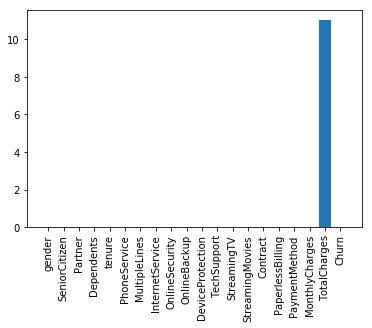

In [172]:
# SOLUTION
missing = dataset.iloc[:, 1:].eq(" ").sum(axis=0)
plt.bar(np.arange(len(missing.values)), missing.values)
plt.xticks(np.arange(len(missing.values)), missing.index.values, rotation="vertical")


We see that there is only 11 values missing in the category "TotalCharges", in a dataset of 7043 datapoints we can easily discard the incomplete rows. If the dataset was smaller, we would have to replace these blank spaces with a statistic of the overall dataset. Remove the missing rows:

In [56]:
# CODE HERE

In [187]:
# SOLUTION
dataset["TotalCharges"].replace(" ", np.nan, inplace=True)
dataset = dataset.dropna()

7032

Plot the rate of churn, what percentage of the clients has cancelled their subscription over the last month?

In [191]:
# CODE HERE

([<matplotlib.axis.XTick at 0x24b8b44be48>,
 <a list of 2 Text xticklabel objects>)

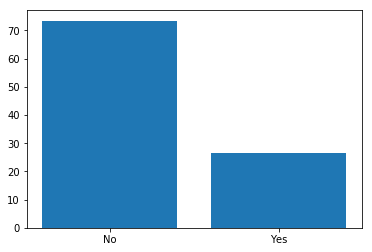

In [192]:
# SOLUTION
left = dataset["Churn"].eq("Yes").sum()
stayed =  dataset["Churn"].eq("No").sum()
plt.bar([0,1], [100 * stayed / (left + stayed), 100 * left / (left + stayed)])
plt.xticks([0,1], ["No", "Yes"])

Now we can use the categorical variables, and see how churn depends on the category. To do this faster, we will use a function that will plot the relevant graphs:

In [222]:
def plot_bar(dataset, var):
    
    values = dataset[var].unique()
    percentages = np.zeros(len(values))
    
    for i in range(len(values)):
        percentages[i] = dataset.loc[dataset[var] == values[i]]["Churn"].eq("Yes").sum()
        
    percentages = 100*percentages/(len(dataset))
    
    ax = plt.bar(np.arange(len(values)), percentages)
    plt.xticks(np.arange(len(values)), values)
    plt.ylabel("Churn per month [%]")
    
    return ax 

### Gender dependence

<BarContainer object of 2 artists>

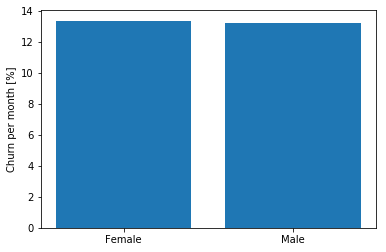

In [223]:
plot_bar(dataset, 'gender')

### Age dependence

<BarContainer object of 2 artists>

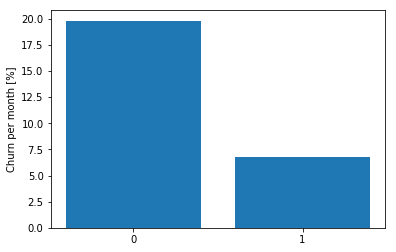

In [224]:
plot_bar(dataset, 'SeniorCitizen')

### Partner

<BarContainer object of 2 artists>

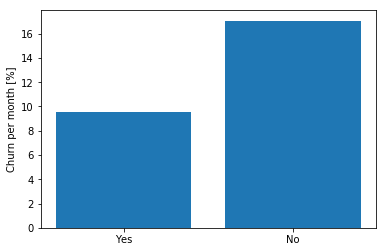

In [228]:
plot_bar(dataset, 'Partner')

### Dependents

<BarContainer object of 2 artists>

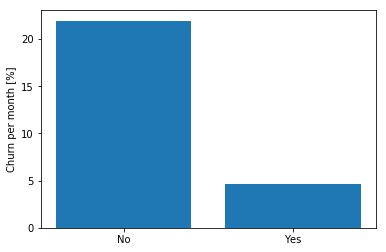

In [230]:
plot_bar(dataset, 'Dependents')

### Phone Service

<BarContainer object of 2 artists>

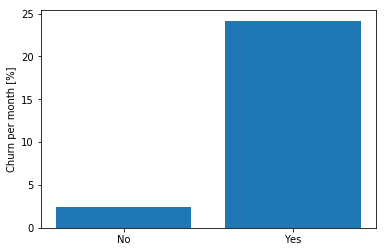

In [232]:
plot_bar(dataset, 'PhoneService')

### Multiple Lines

<BarContainer object of 3 artists>

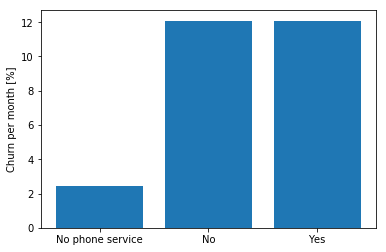

In [233]:
plot_bar(dataset, 'MultipleLines')

### Internet Service

<BarContainer object of 3 artists>

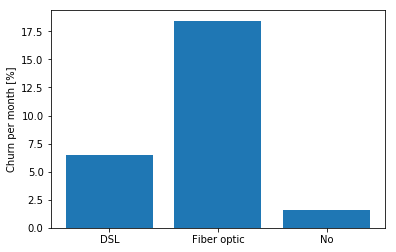

In [234]:
plot_bar(dataset, 'InternetService')

### Online Security

<BarContainer object of 3 artists>

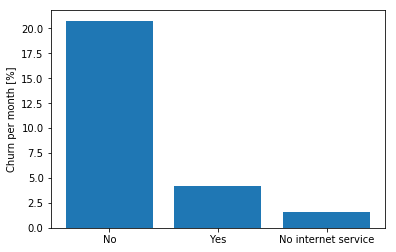

In [235]:
plot_bar(dataset, 'OnlineSecurity')

### Device Protection

<BarContainer object of 3 artists>

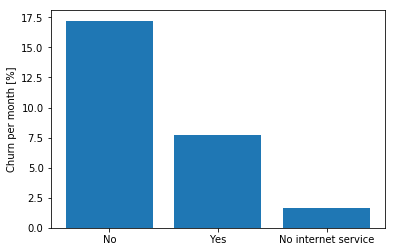

In [236]:
plot_bar(dataset, 'DeviceProtection')

### Tech Support

<BarContainer object of 3 artists>

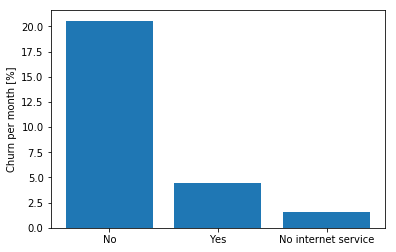

In [237]:
plot_bar(dataset, 'TechSupport')

### Streaming TV

<BarContainer object of 3 artists>

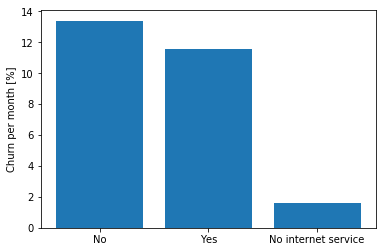

In [247]:
plot_bar(dataset, 'StreamingTV')

### Streaming Movies

<BarContainer object of 3 artists>

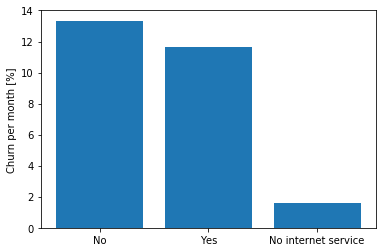

In [239]:
plot_bar(dataset, 'StreamingMovies')

### Contract

<BarContainer object of 3 artists>

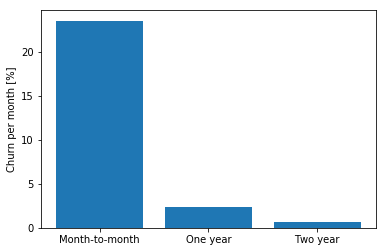

In [240]:
plot_bar(dataset, 'Contract')

### Paperless Billing

<BarContainer object of 2 artists>

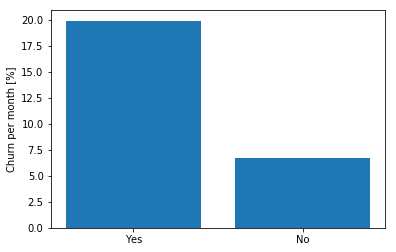

In [241]:
plot_bar(dataset, 'PaperlessBilling')

### Payment Method

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

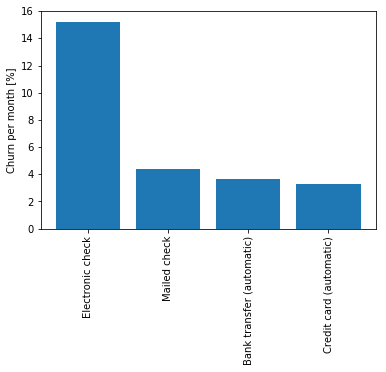

In [244]:
plot_bar(dataset, 'PaymentMethod')
plt.xticks(rotation="vertical")

Use the above graphs to perform a qualitative analysis of the dataset, which features seem to strongly relate to the churn rate? Which features seem unimportant?

SOLUTION:
    - Gender - The churn percent is almost equal in case of Male and Females
    - The percent of churn is higher in case of young citizens
    - Customers with Partners and Dependents have lower churn rate as compared to those who don't have partners & Dependents.
    - Churn rate is much higher in case of Fiber Optic InternetServices.
    - Customers who do not have services like No OnlineSecurity , OnlineBackup and TechSupport have left the platform in the past month.
    - A larger percent of Customers with monthly subscription have left when compared to Customers with one or two year contract.
    - Churn percent is higher in case of customers having paperless billing option.
    - Customers who have ElectronicCheck Payment Method tend to leave the platform more when compared to other options.

The next step is to visualise the remaining three continuous variables, this is usually done in one of two ways:
    - Box plot
    - Histogram

### Tenure

Text(0,0.5,'Churn per month [%]')

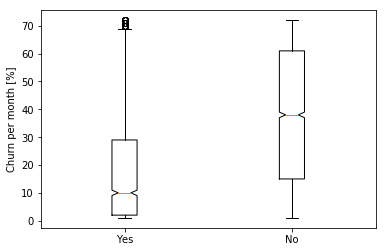

In [280]:
left = dataset.loc[dataset['Churn'] == "Yes"].tenure
right = dataset.loc[dataset['Churn'] == "No"].tenure

plt.boxplot([left.values, right.values], [1,2])
plt.xticks([1,2], ["Yes", "No"])
plt.ylabel("Churn per month [%]")

We can also show this in a histogram!

Text(0.5,0,'Tenure')

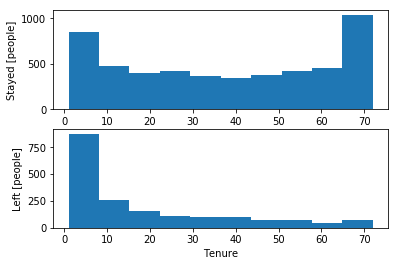

In [283]:
plt.subplot(2,1,1)
plt.hist(right, bins=10)
plt.ylabel("Stayed [people]")
plt.xlabel("Tenure")

plt.subplot(2,1,2)
plt.hist(left, bins=10)
plt.ylabel("Left [people]")
plt.xlabel("Tenure")

### Monthly Charges

Text(0,0.5,'Churn per month [%]')

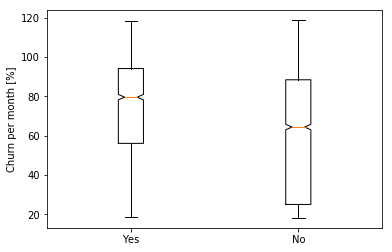

In [270]:
left = dataset.loc[dataset['Churn'] == "Yes"].MonthlyCharges
right = dataset.loc[dataset['Churn'] == "No"].MonthlyCharges

plt.boxplot([left.values, right.values], [1,2])
plt.xticks([1,2], ["Yes", "No"])
plt.ylabel("Churn per month [%]")

### Total Charges

Text(0,0.5,'Churn per month [%]')

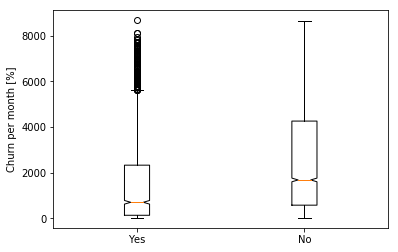

In [274]:
left = dataset.loc[dataset['Churn'] == "Yes"].TotalCharges.astype(np.float)
right = dataset.loc[dataset['Churn'] == "No"].TotalCharges.astype(np.float)

plt.boxplot([left.values, right.values], [1,2])
plt.xticks([1,2], ["Yes", "No"])
plt.ylabel("Churn per month [%]")

Deduce the findings from the above three plots:

 SOLUTION:   
    - Tenure: The median tenure for customers who have left is around 10 months.
    - MonthlyCharges: Customers who have churned, have high monthly charges. The median is above 75.
    - TotalCharges:* The median Total charges of customers who have churned is low.

When working with continuous variables, it is also a good idea to look for correlations between them.